In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta

In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('df2.xlsx', sheet_name='Sheet1')
print(df.tail(10))

        peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeça  \
257  1013.74               36.0                30.3                 9.8   
258   795.64               34.5                28.3                 9.2   
259   911.28               35.5                29.8                 8.2   
260   898.40               36.0                30.2                 9.5   
261   810.48               34.5                28.6                 9.5   
262   822.67               36.0                30.6                 9.0   
263   653.60               32.0                26.7                 9.0   
264   905.54               35.2                28.8                 9.6   
265   754.89               33.3                29.4                 9.5   
266   756.22               33.3                28.2                 8.7   

     altura  
257    11.6  
258    10.8  
259    10.8  
260    10.7  
261    10.2  
262    10.6  
263    10.9  
264     9.1  
265    10.0  
266    10.1  


In [3]:
####### BLIND TEST

#data = df2.sample(frac=0.95, random_state=123)
#data_unseen = df2.drop(data.index)

#data.reset_index(drop=True, inplace=True)
#data_unseen.reset_index(drop=True, inplace=True)

#print('Data for Modeling: ' + str(data.shape))
#print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [4]:
from pycaret.regression import *
#### DATA for BLIND TEST
#exp2= setup(data = data,  target = 'peso')

exp2= setup(data = df,  target = 'peso', train_size=0.8)
best_model = exp2.compare_models()

,Description,Value
0,Session id,5053
1,Target,peso
2,Target type,Regression
3,Original data shape,"(267, 5)"
4,Transformed data shape,"(267, 5)"
5,Transformed train set shape,"(213, 5)"
6,Transformed test set shape,"(54, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,35.4193,2395.8264,47.7897,0.9146,0.0694,0.0534,0.0110
ridge,Ridge Regression,35.9387,2461.9229,48.5282,0.9129,0.0708,0.0545,0.0090
br,Bayesian Ridge,35.9263,2462.0680,48.5295,0.9129,0.0708,0.0544,0.0070
lr,Linear Regression,35.9829,2465.3714,48.5646,0.9127,0.0709,0.0545,0.6600
lar,Least Angle Regression,35.9829,2465.3727,48.5646,0.9127,0.0709,0.0545,0.0080
lasso,Lasso Regression,35.8538,2481.2501,48.6485,0.9123,0.0709,0.0543,0.0080
llar,Lasso Least Angle Regression,35.8545,2480.9781,48.6471,0.9123,0.0709,0.0543,0.0080
en,Elastic Net,39.0087,2813.9494,51.9657,0.9013,0.0764,0.0594,0.0090
et,Extra Trees Regressor,38.7089,2794.7466,52.1071,0.8985,0.0734,0.0566,0.0360
lightgbm,Light Gradient Boosting Machine,39.1131,2911.3966,52.5839,0.8964,0.0743,0.0572,0.0420


In [5]:
rf = exp2.create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27.0578,1241.8205,35.2395,0.9275,0.0548,0.0434
1,34.1746,1962.3431,44.2983,0.9301,0.0590,0.0472
2,22.9764,1692.3122,41.1377,0.9381,0.0528,0.0310
3,27.9966,1089.3318,33.0050,0.9521,0.0554,0.0464
4,37.3357,2005.9788,44.7882,0.9344,0.0585,0.0500
5,35.5333,1629.1873,40.3632,0.9499,0.0642,0.0555
6,44.9868,4252.3837,65.2103,0.8241,0.0906,0.0642
7,37.9155,3074.6713,55.4497,0.9325,0.0795,0.0563
8,45.1715,3555.2024,59.6255,0.8711,0.0893,0.0714


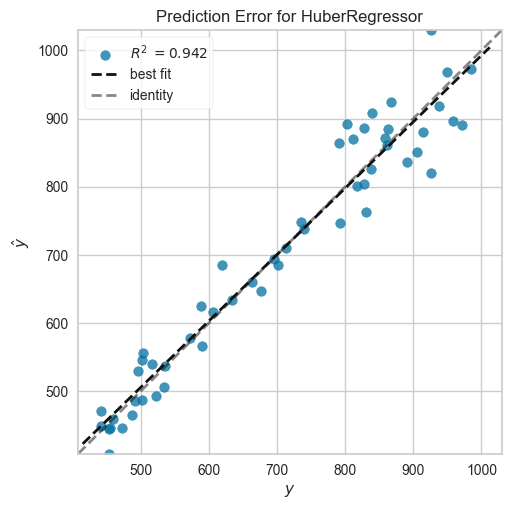

In [6]:
exp2.plot_model(rf, plot = 'error')

In [7]:
exp2.evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [8]:
peso_pred_semEspe = exp2.predict_model(rf)
peso_pred_semEspe.tail(10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,32.3803,1800.3775,42.4309,0.9418,0.0563,0.0452


,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
141,32.000000,27.400000,8.0,10.2,713.000000,709.793746
29,28.799999,24.500000,7.8,9.4,536.239990,537.537429
201,35.000000,29.000000,9.5,11.2,863.520020,885.000622
207,36.000000,29.700001,9.8,11.0,839.780029,907.749292
150,32.500000,27.500000,7.1,10.5,740.030029,738.016945
68,29.400000,24.299999,8.0,9.6,590.030029,566.062475
162,32.299999,27.100000,7.1,10.0,695.059998,694.437009
243,36.400002,31.500000,9.8,11.5,984.979980,972.236011
256,35.400002,29.799999,9.5,11.5,867.059998,924.779945
198,36.799999,29.700001,9.7,12.5,925.979980,1029.645598


In [9]:
peso_pred_semEspe.head()

,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
231,35.500000,30.200001,9.3,10.9,971.500000,889.854488
117,35.500000,30.100000,9.2,10.5,862.080017,860.954964
174,34.099998,28.700001,9.6,11.4,858.599976,872.185987
116,30.500000,25.500000,8.2,9.7,605.609985,616.628493
16,27.200001,23.400000,7.4,8.9,471.799988,446.426428


# Slavando do Modelo

In [10]:
### Saving model 
save_model(rf, 'huber_df2') 


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['comprimento_Total',
                                              'comprimento_Padrao',
                                              'comprimento_Cabeça', 'altura'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', HuberRegressor())]),
 'huber_df2.pkl')

In [16]:
################### LOADING MODEL
saved_rf = load_model('gbr_df1') 

saved_rf 

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\crist\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['comprimento_Total',
                                             'comprimento_Padrao',
                                             'comprimento_Cabeça', 'altura'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 GradientBoostingRegressor(random_state=3390))])

In [17]:
exp2.predict_model(saved_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,10.7730,431.8418,20.7808,0.9698,0.0827,0.0613


,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
451,21.500000,17.900000,5.8,7.1,255.080002,233.648845
577,24.299999,20.299999,6.2,8.0,352.519989,333.177453
483,24.200001,20.600000,5.8,7.5,296.239990,318.717987
314,17.700001,15.000000,4.8,5.3,119.209999,116.416024
380,20.600000,17.799999,5.9,7.0,188.199997,225.403592
...,...,...,...,...,...,...
210,14.800000,12.800000,3.4,4.5,69.970001,68.581856
515,25.400000,21.299999,6.2,8.3,408.440002,396.402615
65,13.200000,11.100000,3.3,4.0,40.840000,42.661610
236,15.000000,12.700000,4.0,4.6,68.709999,69.134634


In [13]:
##################### BLIND TEST
#pred_unseen = predict_model(rf, data = data_unseen)
#pred_unseen.head(5)